In [1]:
#imports, run first.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#tool for showing values on bar charts
def show_values_on_bars(axs, space=0.4):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            if np.isnan(p.get_width()):
                break
            value = int(p.get_width())
            ax.text(_x, _y, str(value) + " described", ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [2]:
# Read data from file
raw = pd.read_csv("../input/cleaned-cqi-arabica-coffee-data/arabica_data_cleaned_update.csv")
# removing unecessary data
raw = raw.drop(columns="ID")
#removing outlier coffee
raw = raw.drop([1310])
data = raw[['Country', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Processing.Method','Total.Cup.Points']]
data.head()

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Processing.Method,Total.Cup.Points
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,Washed / Wet,90.58
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,Washed / Wet,89.92
2,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,NaN,89.75
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,Natural / Dry,89.00
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,Washed / Wet,88.83


In [3]:
#plotting
#g = sns.FacetGrid(topProducers, col="Aroma")
#g.map(plt.scatter, "Total.Cup.Points", "Aroma");
#g = sns.PairGrid(topProducers)
#g.map(plt.scatter);

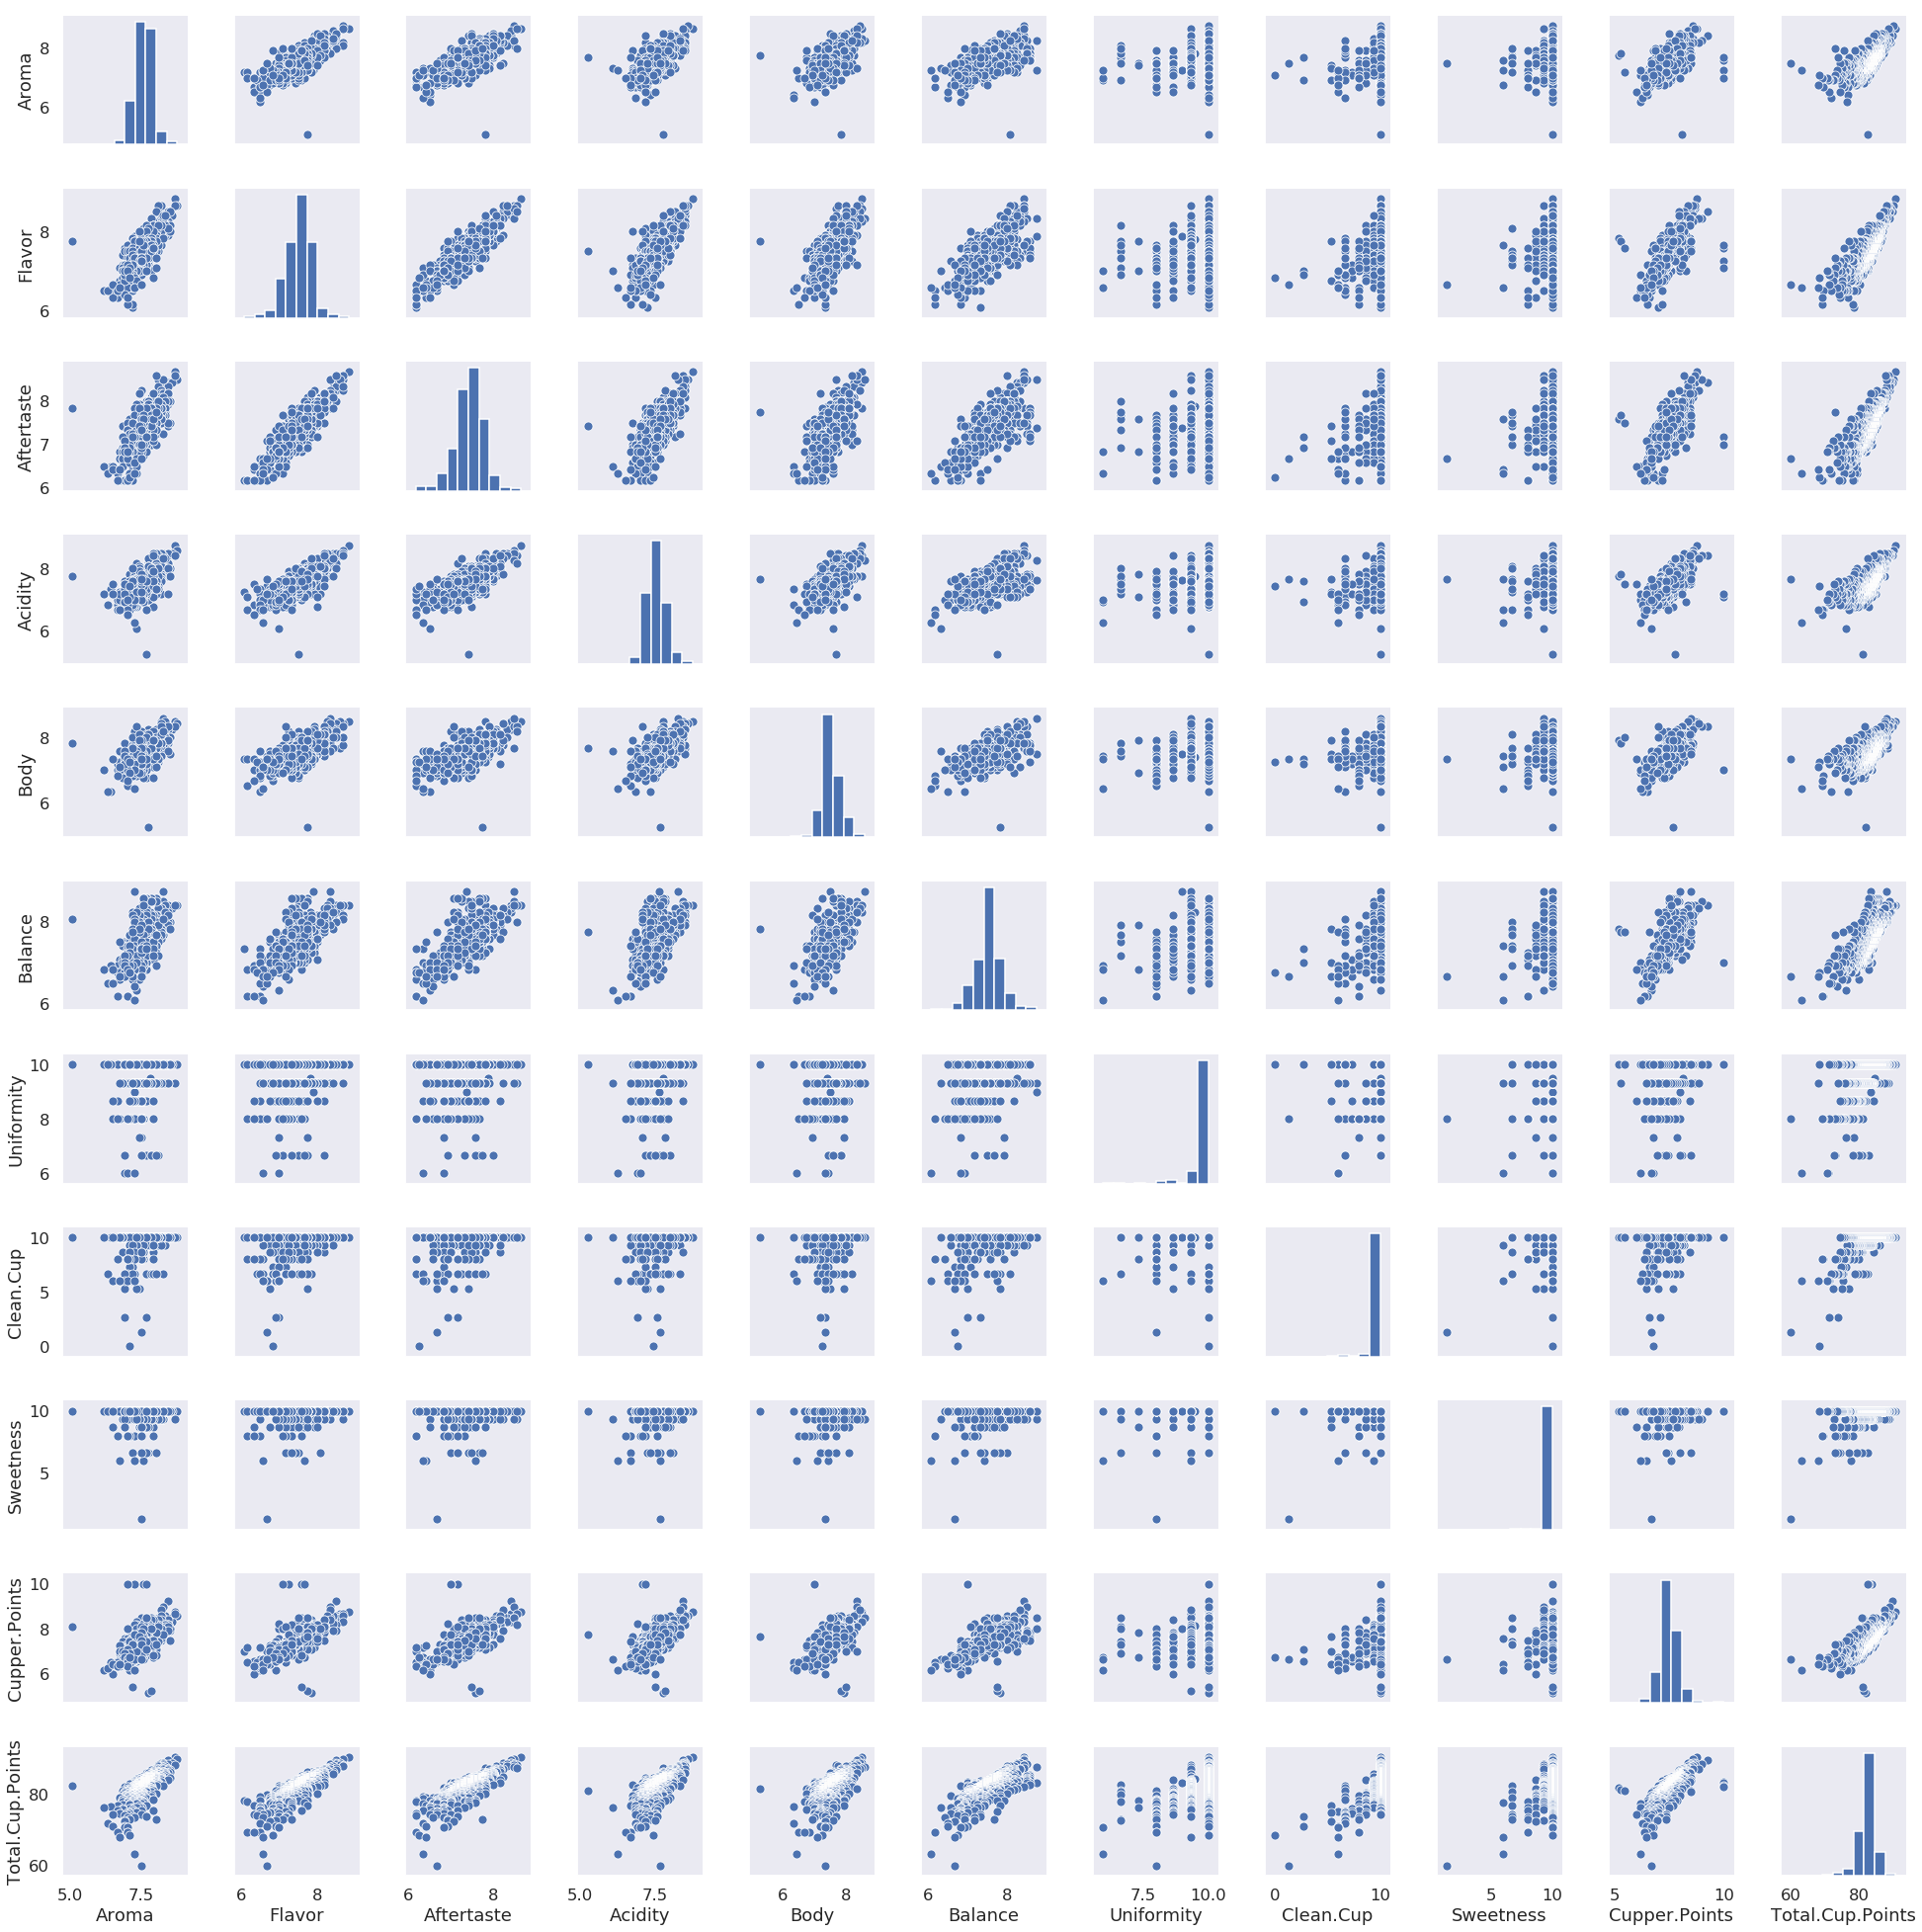

In [4]:
sns.set(style="dark")
sns.set_context("talk")
g = sns.pairplot(data);

#save figure to file
g.savefig("overview.png")

In [5]:
# Figuring out what countries have the most coffees represented

# Creating a new dataframe to hold counts of coffees for each country
CC = data['Country'].value_counts().to_frame()
CC.columns.values[0] = 'Count'

# Make a new column that identifies whether there is an acceptable sample size (in this case, 30)
CC['Sufficient Sample Size'] = np.where(CC['Count']>=30, 'Kept', 'Removed')
CC.head(12)

# Our chosen top 11 producing countries are:
# Mexico; Colombia; Guatemala; Brazil; Taiwan; United States (Hawaii); 
# Honduras; Costa Rica; Ethiopia; Tanzania, United Republic Of; Thailand

,Count,Sufficient Sample Size
Mexico,236,Kept
Colombia,183,Kept
Guatemala,181,Kept
Brazil,132,Kept
Taiwan,75,Kept
United States (Hawaii),73,Kept
Honduras,52,Kept
Costa Rica,51,Kept
Ethiopia,44,Kept
"Tanzania, United Republic Of",40,Kept


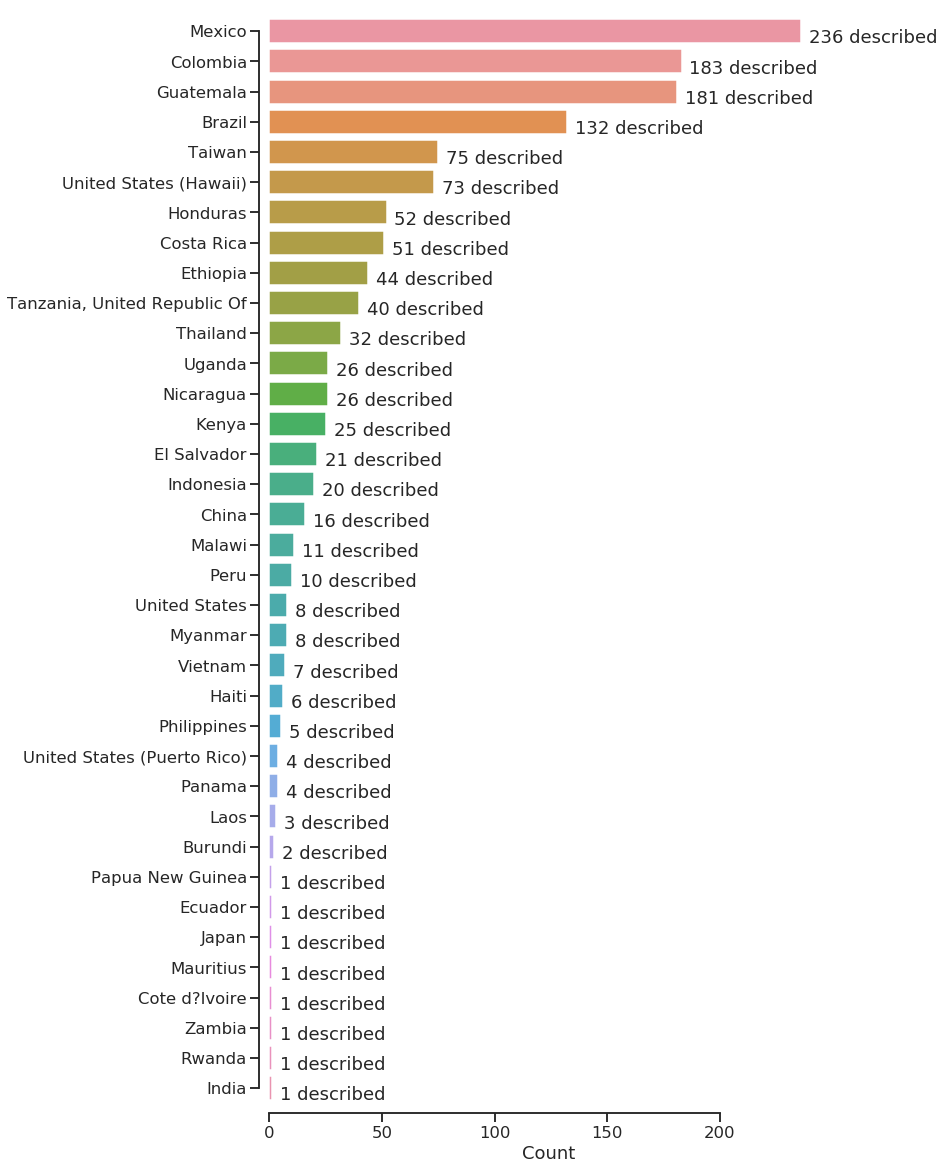

In [6]:
# Let's make a summary figure
sns.set(style="ticks")
sns.set_context("talk")
f, ax = plt.subplots(figsize=(10, 20))
f = sns.barplot(y=CC.index,x='Count', data=CC)
sns.despine(offset=10, trim=True);
show_values_on_bars(f, 3.5)

In [7]:
#save figure to file
ax.get_figure().savefig("overview_countries.png",bbox_inches = "tight")

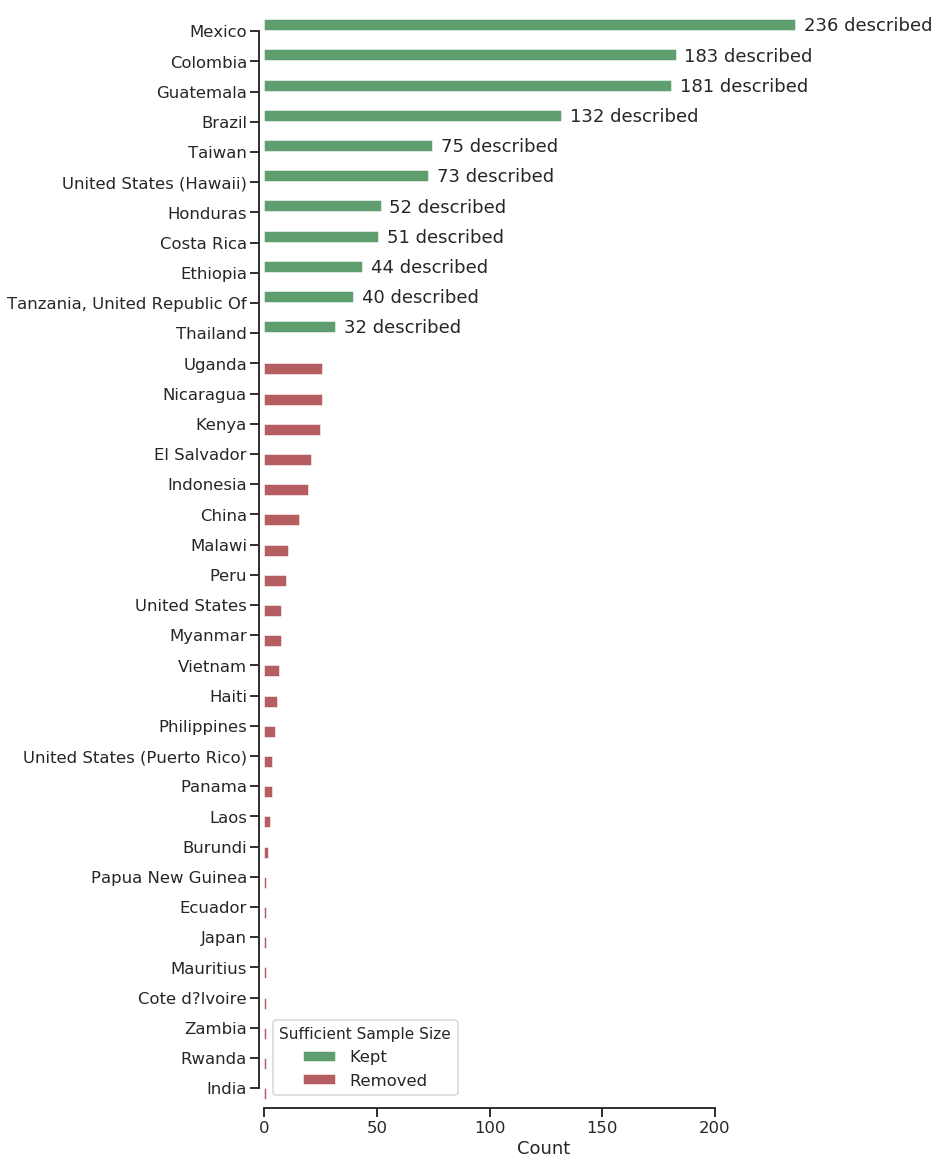

In [8]:
#making another figure to show which countries were kept
sns.set(style="ticks")
sns.set_context("talk")
f, ax = plt.subplots(figsize=(10, 20))
temp = data['Country'].value_counts()
CC = temp.to_frame()
CC.columns.values[0] = 'Count'
CC['Sufficient Sample Size'] = np.where(CC['Count']>=30, 'Kept', 'Removed')
f = sns.barplot(y=CC.index,x='Count', data=CC, hue='Sufficient Sample Size', palette=["g","r"])
sns.despine(offset=5, trim=True);
show_values_on_bars(f, 3.5)

In [9]:
#save figure to file
f.get_figure().savefig("chosen_countries.png", bbox_inches = "tight")

In [10]:
#making a new dataframe with top 11 producing countries.
topC = ['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan', 'United States (Hawaii)', 
        'Honduras', 'Costa Rica', 'Ethiopia', 'Tanzania, United Republic Of', 'Thailand']
top = data.loc[data.Country.isin(topC)]
top.head()

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Processing.Method,Total.Cup.Points
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,Washed / Wet,90.58
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,Washed / Wet,89.92
2,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,NaN,89.75
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,Natural / Dry,89.00
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,Washed / Wet,88.83


In [11]:
#sns.set(style="dark")
#sns.set_context("talk")
# Because we have 11 countries, it would be nice to identify them with a custom color set from ColorBrewer.
#colorBrew = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']
#g = sns.pairplot(top, hue='Country', palette = colorBrew);

In [12]:
#save figure to file
#g.savefig("topOverview.png", bbox_inches = "tight")

In [13]:
#PCA to see if I can group things - take notes
#Clean processing and make pair plot
#MATH 448 Introduction to Statistical Learning by James Witten Hastie Tibshirani
#Make summary stats for each (min,max,mean,median,q1,q3,sd) box plots?
#Look at Moisture

In [14]:
#Clean processing and make pair plot
#sns.set(style="dark")
#sns.set_context("talk")
# Because we have 5 methods, it would be nice to identify them with a custom color set from ColorBrewer.
#colorBrew = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462']
#g = sns.pairplot(top, hue='Processing.Method', palette = colorBrew);

In [15]:
#save figure to file
g.savefig("topProcessingOverview.png", bbox_inches = "tight")

                count      mean       std   min   25%   50%   75%    max
Aroma          1099.0  7.560018  0.306705  5.08  7.42  7.58  7.75   8.75
Flavor         1099.0  7.514186  0.333342  6.08  7.33  7.50  7.71   8.83
Aftertaste     1099.0  7.392766  0.344418  6.17  7.25  7.42  7.58   8.67
Acidity        1099.0  7.535760  0.304797  5.25  7.33  7.50  7.75   8.75
Body           1099.0  7.512584  0.289930  5.25  7.33  7.50  7.67   8.58
Balance        1099.0  7.516761  0.345370  6.17  7.33  7.50  7.75   8.75
Cupper.Points  1099.0  7.497116  0.421686  5.25  7.25  7.50  7.75  10.00


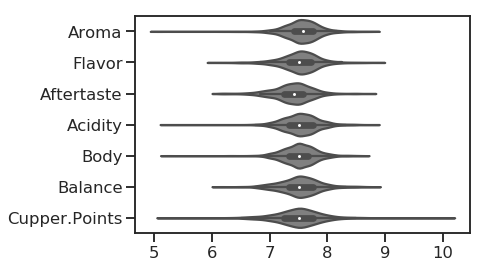

In [16]:
#Make summary stats for each (min,max,mean,median,q1,q3,sd) box plots?
topNorm = top.drop(columns={"Total.Cup.Points","Sweetness","Clean.Cup","Uniformity","Country","Processing.Method"})
summary = topNorm.describe().T
totalCup = top[["Total.Cup.Points"]]
#sns.jointplot(x='Aroma',y='Total.Cup.Points',data=top, kind='reg')
sns.violinplot(data=topNorm,orient='h',color='grey')
print(summary)

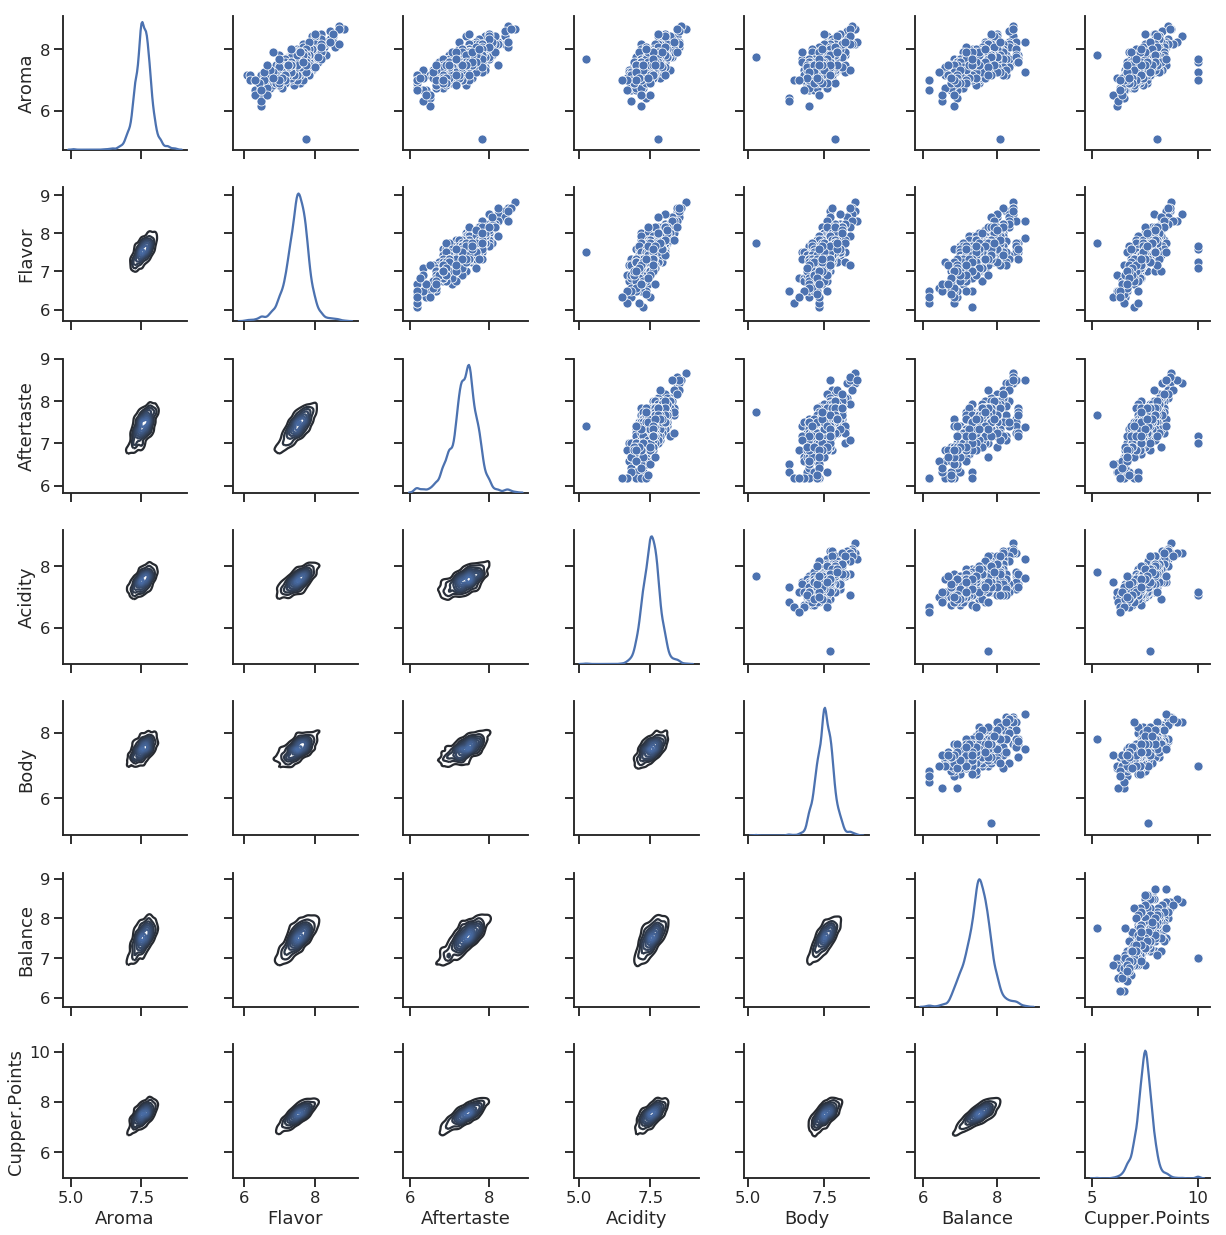

In [17]:
g = sns.PairGrid(topNorm, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)

## PCA Part 1

In [18]:
# clearly defining our target is total cup points.
pcaData = top.drop(columns={"Sweetness","Clean.Cup","Uniformity","Country","Processing.Method"})
pcaData = pcaData.rename(columns={"Total.Cup.Points":"target"})
pcaData.head(10)
# standardize the data
from sklearn.preprocessing import StandardScaler
features = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Cupper.Points']
# Separating out the features
x = pcaData.loc[:, features].values
# Separating out the target
y = pcaData.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(pcaData[['target']].head(10))
finalDf = pd.concat( [ principalDf, pcaData[['target']] ], axis = 1)
print(finalDf.head(10))

    target
0    90.58
1    89.92
2    89.75
3    89.00
4    88.83
5    88.83
7    88.67
8    88.42
9    88.25
10   88.08
   principal component 1  principal component 2  target
0               9.171267               0.241993   90.58
1               8.415765               0.398906   89.92
2               8.016585               0.211039   89.75
3               7.333275              -0.716766   89.00
4               7.133585              -0.575348   88.83
5               7.194040               0.322575   88.83
6               7.571499              -0.360700     NaN
7               8.196343               0.556062   88.67
8               6.450034               0.988413   88.42
9               6.262543               1.200893   88.25


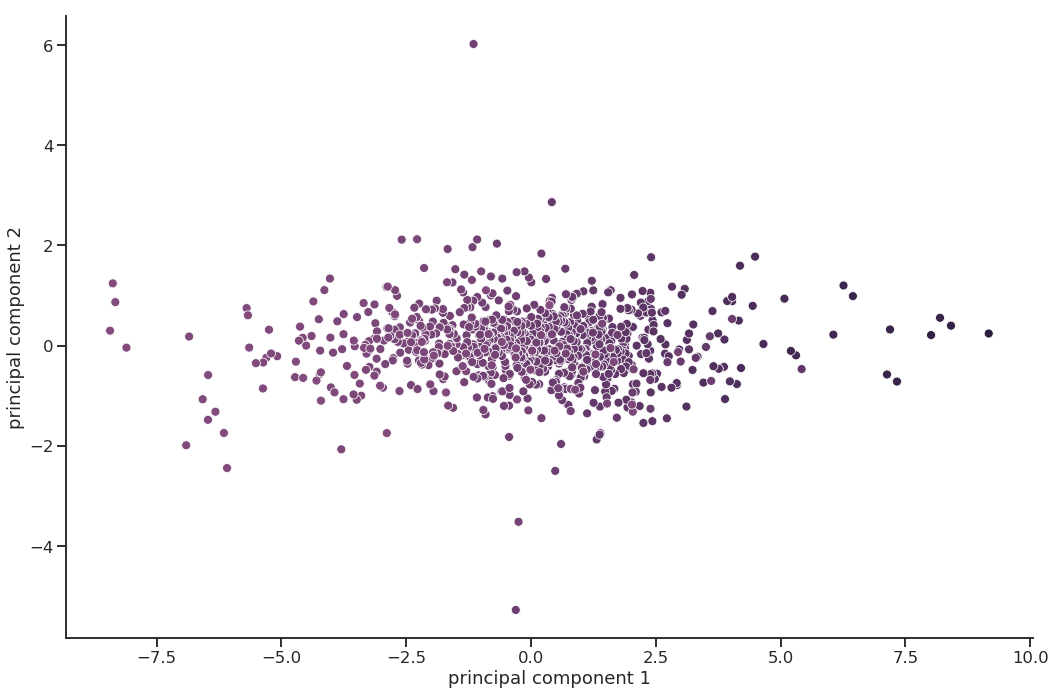

In [19]:
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'target', legend = False, height=10, aspect=1.5, data = finalDf)

The problem with the graph above is that our target is a range of scores, so it seems difficult to interpret or predict an exact score. I am now considering using collections of scores. I know that the mean for total cup score is 82.1, the minimum is 59.8, the maximum is 90.6, and the 25 and 75 quartiles are 81.1 and 83.6. It seems that only extraordinary coffees break far from the mean score of 82. Therefore, let us consider three scores: Below Average (<81.1), Average, and Above Average(>83.6). My next step will be to make a new column with these.

In [20]:
# Make a new column that identifies whether there is an acceptable sample size (in this case, 30)

finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
finalDf.head(10)

,principal component 1,principal component 2,target,Rating
0,9.171267,0.241993,90.58,Above Average
1,8.415765,0.398906,89.92,Above Average
2,8.016585,0.211039,89.75,Above Average
3,7.333275,-0.716766,89.00,Above Average
4,7.133585,-0.575348,88.83,Above Average
5,7.194040,0.322575,88.83,Above Average
6,7.571499,-0.360700,NaN,Average
7,8.196343,0.556062,88.67,Above Average
8,6.450034,0.988413,88.42,Above Average
9,6.262543,1.200893,88.25,Above Average


oh no. it seems we have multiple NaN target values. Time to do some research.

results of research: when I removed rows of coffees, it didn't update the index. The NaN is caused by a mismatch during the concatenation. If I update the indices to show the correct line number BEFORE concatenation, it should work.

In [21]:
print(pcaData[['target']].reset_index().head(10))
finalDf = pd.concat( [ principalDf, pcaData[['target']].reset_index() ], axis = 1)
finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
print(finalDf.head(15))

   index  target
0      0   90.58
1      1   89.92
2      2   89.75
3      3   89.00
4      4   88.83
5      5   88.83
6      7   88.67
7      8   88.42
8      9   88.25
9     10   88.08
    principal component 1  principal component 2  index  target         Rating
0                9.171267               0.241993      0   90.58  Above Average
1                8.415765               0.398906      1   89.92  Above Average
2                8.016585               0.211039      2   89.75  Above Average
3                7.333275              -0.716766      3   89.00  Above Average
4                7.133585              -0.575348      4   88.83  Above Average
5                7.194040               0.322575      5   88.83  Above Average
6                7.571499              -0.360700      7   88.67  Above Average
7                8.196343               0.556062      8   88.42  Above Average
8                6.450034               0.988413      9   88.25  Above Average
9                6.2625

Success. Let us try this and see how it looks.

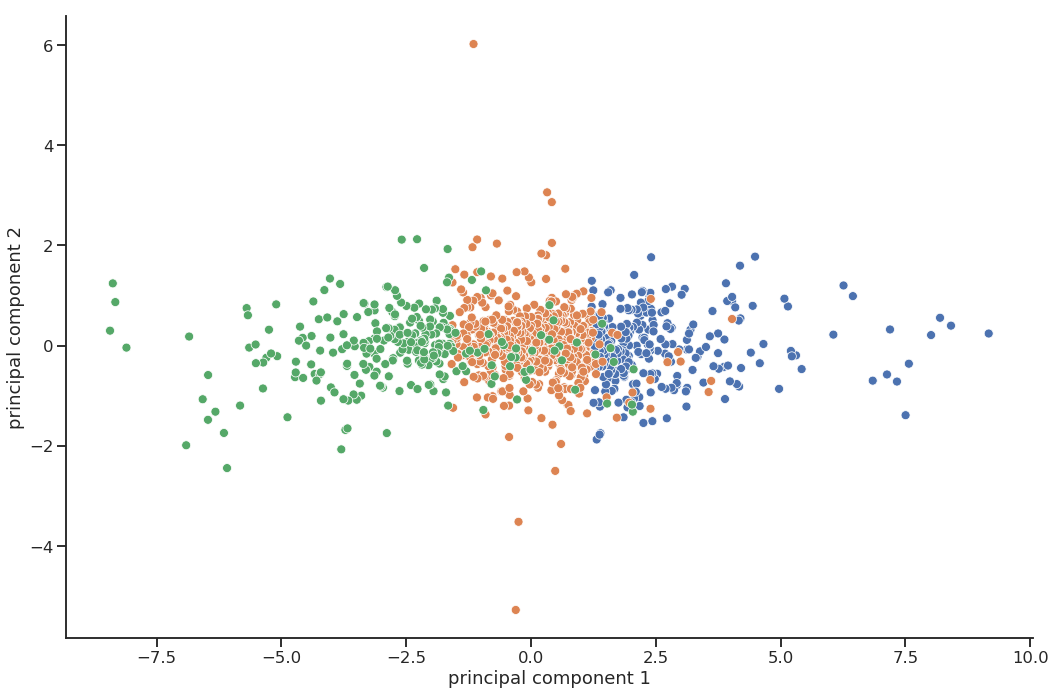

In [22]:
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'Rating', legend = False, height=10, aspect=1.5, data = finalDf)

I realize now that I should probably run PCA with this grouped rating as the target instead. Let's try this again from the start.

In [23]:
#prepare our data
pcaData = top.drop(columns={"Sweetness","Clean.Cup","Uniformity","Country","Processing.Method"})
#create new column for rating, our target
pcaData['target'] = np.where(pcaData['Total.Cup.Points']>=83.6, 'Above Average', 'Average')
pcaData['target'] = np.where(pcaData['Total.Cup.Points']<=81.1, 'Below Average', pcaData['target'])
# standardize the data
from sklearn.preprocessing import StandardScaler
features = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Cupper.Points','Total.Cup.Points']
# Separating out the features
x = pcaData.loc[:, features].values
# Separating out the target
y = pcaData.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# run PCA from scikit-learn
from sklearn.decomposition import PCA
# run with two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
#prepare principals
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# concatenate (don't forget .reset_index() to match index)
finalDf = pd.concat([principalDf, pcaData[['target']].reset_index()], axis = 1)
#check
print("Sample of Data After PCA:  \n ", finalDf.sample(20))

Sample of Data After PCA:  
        principal component 1  principal component 2  index         target
895               -2.376248               0.341095   1069  Below Average
425                0.648663              -0.336181    521        Average
346                0.915728               0.113869    428        Average
22                 4.732812               0.637301     32  Above Average
395                0.716864               0.012619    485        Average
899               -0.965824              -0.773099   1075  Below Average
21                 4.793600               1.667658     31  Above Average
115                2.446329               0.049934    167  Above Average
492                0.229441              -0.312652    607        Average
855               -1.871564               0.179218   1020  Below Average
961               -2.459181              -0.379755   1151  Below Average
742               -0.942388               0.476593    886        Average
911               -2.

So far, so reasonable. Let us test a plot to see if we find anything of interest.

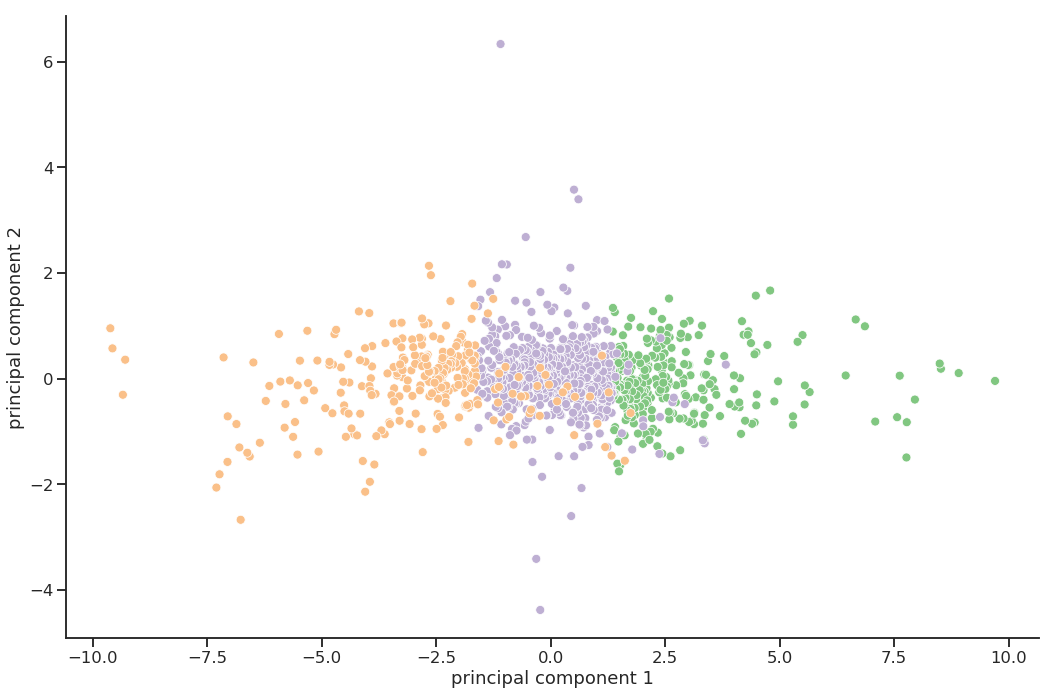

In [24]:
sns.set_palette("Accent", n_colors=3, desat=0.95)
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'target', legend = False, height=10, aspect=1.5, data = finalDf)

Let us consider another option, setting it to 95% of variance rather than number of components. How many components would we need? What about 90%?

In [25]:
#prepare our data
pcaData = top.drop(columns={"Sweetness","Clean.Cup","Uniformity","Country","Processing.Method"})
#create new column for rating, our target
pcaData['target'] = np.where(pcaData['Total.Cup.Points']>=83.6, 'Above Average', 'Average')
pcaData['target'] = np.where(pcaData['Total.Cup.Points']<=81.1, 'Below Average', pcaData['target'])
# standardize the data
from sklearn.preprocessing import StandardScaler
features = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Cupper.Points','Total.Cup.Points']
# Separating out the features
x = pcaData.loc[:, features].values
# Separating out the target
y = pcaData.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# run PCA from scikit-learn
from sklearn.decomposition import PCA
# run with multiple variance
variance = [0.95, 0.90, 0.85, 0.80]
for i in variance:
    pca = PCA(i)
    principalComponents = pca.fit_transform(x)
    print("To maintain a", i,  "variance, we need", pca.n_components_, "components.")

To maintain a 0.95 variance, we need 6 components.
To maintain a 0.9 variance, we need 5 components.
To maintain a 0.85 variance, we need 4 components.
To maintain a 0.8 variance, we need 3 components.


### Okay, now what?
Maybe teach a model to predict? Seems not useful. Maybe just find the most important factors required to predict? That would need a different approach.

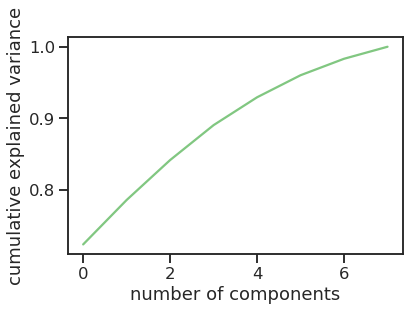

In [26]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 697 Begins below this line!
Starting from here, we enter our second half. First, let's try running a linear regression on our data.

In [27]:
#Hit Run After, starting from this code block.

In [28]:
#imports, run first.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#tool for showing values on bar charts
def show_values_on_bars(axs, space=0.4):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            if np.isnan(p.get_width()):
                break
            value = int(p.get_width())
            ax.text(_x, _y, str(value) + " described", ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [29]:
# Read data from file
raw = pd.read_csv("../input/cleaned-cqi-arabica-coffee-data/arabica_data_cleaned_update.csv")
# removing unnecessary fields
raw = raw.drop(columns="ID")
#removing outlier coffees
raw = raw.drop([1310])
# WHY did we drop this? 

#establish field name
data = raw[['Country', 'Variety', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Processing.Method','Total.Cup.Points']]
data.count()

Country              1309
Variety              1109
Aroma                1310
Flavor               1310
Aftertaste           1310
Acidity              1310
Body                 1310
Balance              1310
Uniformity           1310
Clean.Cup            1310
Sweetness            1310
Cupper.Points        1310
Processing.Method    1159
Total.Cup.Points     1310
dtype: int64

In [30]:
#check for any null/missing values
data = data.dropna()
data = data.reset_index().drop(columns="index") # DONT FORGET TO RESET YOUR INDEX WHEN YOU REMOVE ROWS!
data.count()
data.tail()
# we have 1086 rows to work with.

,Country,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Processing.Method,Total.Cup.Points
1081,Honduras,Catuai,7.00,6.33,6.17,6.50,6.67,6.17,8.00,8.00,8.00,6.33,Washed / Wet,69.17
1082,Mexico,Bourbon,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,Washed / Wet,68.33
1083,Haiti,Typica,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,Natural / Dry,67.92
1084,Nicaragua,Caturra,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,Other,63.08
1085,Guatemala,Catuai,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,Washed / Wet,59.83


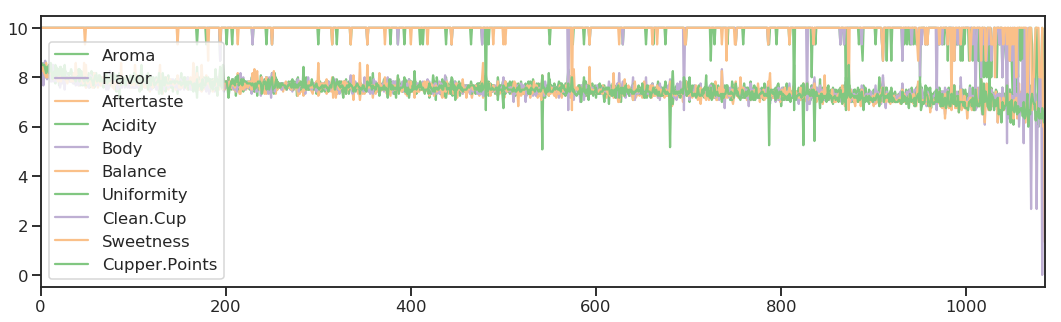

In [31]:
#examine a graph of the numerical values
features = data.drop(columns = "Total.Cup.Points")
features.plot(figsize=(18,5))

In [32]:
target = data['Total.Cup.Points']
# now we have features and target separated if needed.
# data = full set
# target = Total Cup Points
# features =
#Country	Variety		Aroma		Flavor		Aftertaste		Acidity		Body
#Balance	Uniformity	Clean.Cup	Sweetness	Cupper.Points	Processing.Method

## Linear Regression
It's time to do a linear regression on our numerical data. We don't expect anything wild.

In [33]:
# Necessary imports: 
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Establish features (JUST THE NUMERICAL COLUMNS) and target
X = features[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']];
y = target;

#set up test/training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(868, 10) (868,)
(218, 10) (218,)


Mean squared error: 0.00
Coefficient of determination: 1.00
Coefficients:
Aroma - 1.0016252596086614
Flavor - 0.9995436942083296
Aftertaste - 1.0037852328014778
Acidity - 0.9965219992512487
Body - 1.0035035227943787
Balance - 1.002861563923791
Uniformity - 1.0051999699519447
Clean.Cup - 1.000470364707067
Sweetness - 0.9978352621661124
Cupper.Points - 0.9938075109014546
Score: 0.9999917491143993


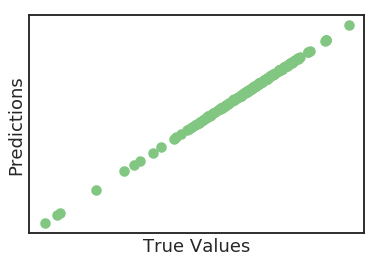

In [34]:
# create model... hello again object oriented programming
lm = linear_model.LinearRegression()
# fit model to training set
model = lm.fit(X_train, y_train)


# you have a model now!
#time to test it.

#make predictions using testing set
predictions = lm.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
# The coefficients
print("Coefficients:")
for x in X_test.columns:
    print(x, "-",lm.coef_[X_test.columns.get_loc(x)])
# Check R^2 Score
print("Score:", model.score(X_test, y_test))

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.xticks(())
plt.yticks(())

plt.show()

## PCA Part 2
Okay! Let's look at adding text values to PCA.

In [35]:
# creating arrays of features and targets
X = features.values
y = data.loc[:,['Total.Cup.Points']].values
# standardize the data
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

Running this gives us an error. We will need to convert our categorical data to numerical data. One option is to use One Hot encoding.

In [36]:
#let's check our types.
print(features.dtypes)
# we don't want these "object" types.
OHE_features = pd.get_dummies(features)
#let's check our new set of One Hot Encoded features.
print(OHE_features.dtypes)

Country               object
Variety               object
Aroma                float64
Flavor               float64
Aftertaste           float64
Acidity              float64
Body                 float64
Balance              float64
Uniformity           float64
Clean.Cup            float64
Sweetness            float64
Cupper.Points        float64
Processing.Method     object
dtype: object
Aroma                                          float64
Flavor                                         float64
Aftertaste                                     float64
Acidity                                        float64
Body                                           float64
                                                ...   
Processing.Method_Natural / Dry                  uint8
Processing.Method_Other                          uint8
Processing.Method_Pulped natural / honey         uint8
Processing.Method_Semi-washed / Semi-pulped      uint8
Processing.Method_Washed / Wet                   uint8
Leng

In [37]:
# standardizing an array of features
X = OHE_features.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
target = pd.DataFrame(data=y, columns=["target"])

In [38]:
#beginning PCA
from sklearn.decomposition import PCA
#create pca object
pca = PCA(n_components=2)
#fit features
principalComponents = pca.fit_transform(X)
#set up temp data frame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#include target
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
print(finalDf.tail(10))

      principal component 1  principal component 2  target         Rating
1076               5.957640               1.010428   71.08  Below Average
1077               7.364996               0.402641   71.00  Below Average
1078               6.316578               0.855270   70.75  Below Average
1079               9.212633               1.313486   69.33  Below Average
1080               9.482461               1.213991   69.17  Below Average
1081               9.433089               1.253268   69.17  Below Average
1082               6.596779               0.438523   68.33  Below Average
1083               8.444323               3.575751   67.92  Below Average
1084              10.574343               3.216469   63.08  Below Average
1085               7.362673               3.135875   59.83  Below Average


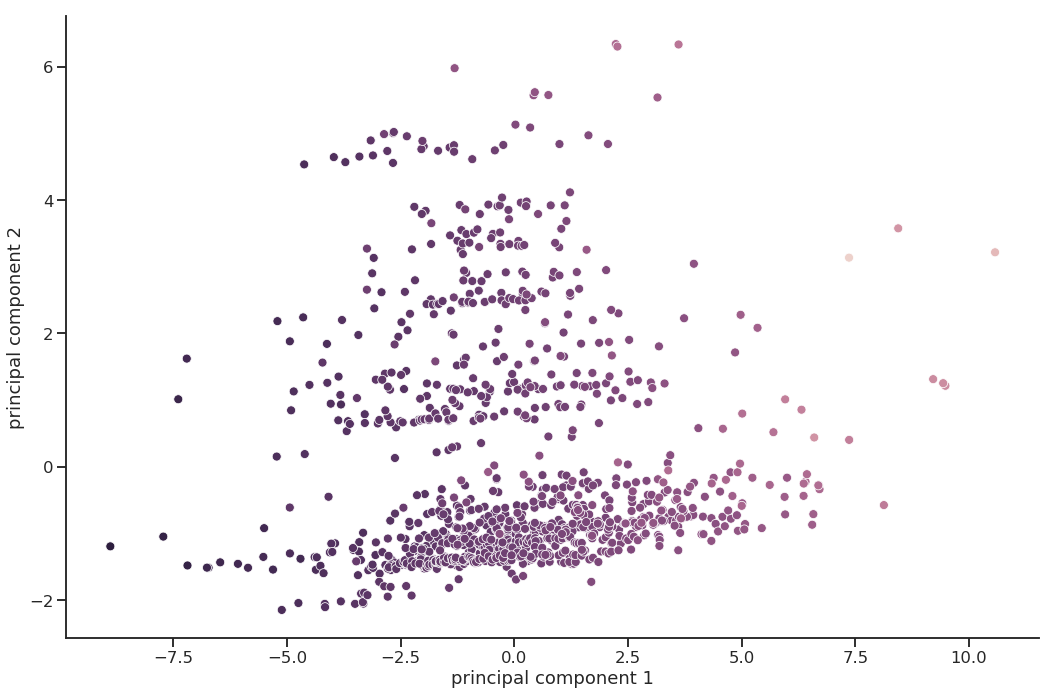

In [39]:
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'target', legend = False, height=10, aspect=1.5, data = finalDf)

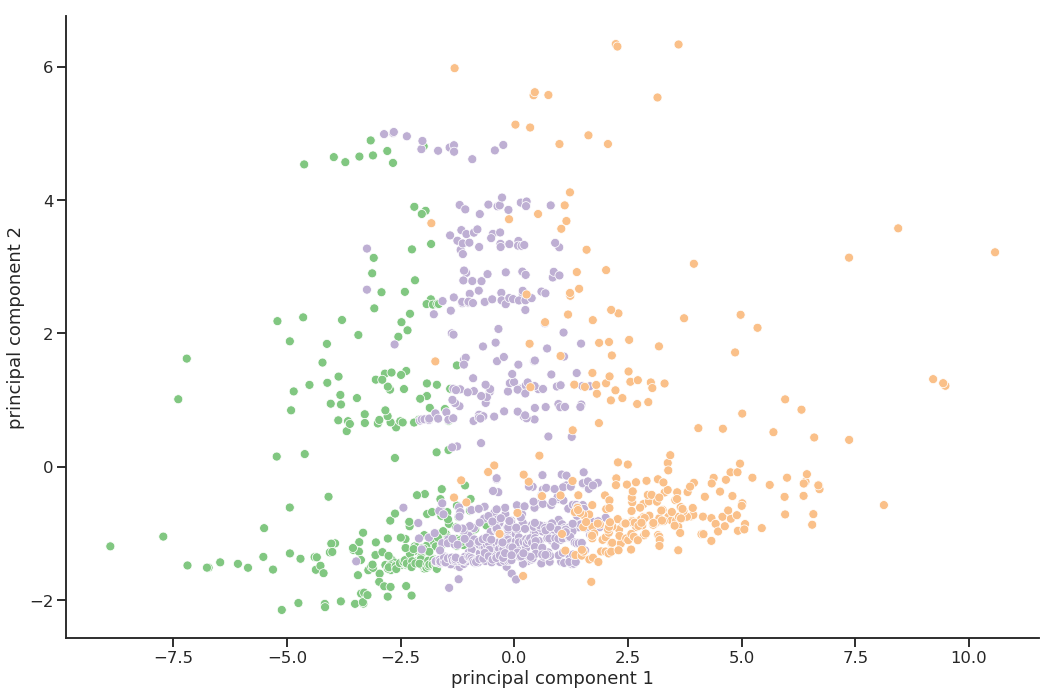

In [40]:
sns.set_palette("Accent", n_colors=3, desat=0.95)
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'Rating', legend = False, height=10, aspect=1.5, data = finalDf)

## Meeting Notes 02/12/2020
TODO items from last meeting:
- Look at Kaggle as an option for online Jupyter Notebooks
- Reacquaint myself with the data and my PCA
- Add Variety, Processing, and Country to PCA
- Make a linear regression model with the subscores
---
- Why did we drop that coffee? for documentation
- Check if PCA runs with OHE variables
- number of components needed for certain amount of variability
- method to separate component's components
- share to KAGGLE
---
- linear regression including OHE must include scaling
- look at random forest for prediction
